In [1]:
pwd

In [2]:
ls

Untitled.ipynb          input/                  tmdb.py
Untitled1.ipynb         submission.csv          tmdb2.py
columns.png             submission1.csv         tmdb过程.docx
feature_engineering.py  tbdm_process.ipynb


In [3]:
ls input

sample_submission.csv  test.csv               train.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [5]:
train = pd.read_csv('input/train.csv')

In [6]:
test = pd.read_csv('input/test.csv')

In [7]:
sample = pd.read_csv('input/sample_submission.csv')

In [8]:
train.shape

(3000, 23)

In [9]:
test.shape

(4398, 22)

In [10]:
sample.shape

(4398, 2)

In [11]:
train.dtypes.sort_values()

id                         int64
budget                     int64
revenue                    int64
popularity               float64
runtime                  float64
genres                    object
cast                      object
Keywords                  object
title                     object
tagline                   object
status                    object
spoken_languages          object
release_date              object
production_countries      object
crew                      object
poster_path               object
overview                  object
original_title            object
original_language         object
imdb_id                   object
homepage                  object
belongs_to_collection     object
production_companies      object
dtype: object

In [12]:
train.select_dtypes(include='int64').head()

,id,budget,revenue
0,1,14000000,12314651
1,2,40000000,95149435
2,3,3300000,13092000
3,4,1200000,16000000
4,5,0,3923970


In [13]:
train.select_dtypes(include='float64').head()

,popularity,runtime
0,6.575393,93.0
1,8.248895,113.0
2,64.299990,105.0
3,3.174936,122.0
4,1.148070,118.0


In [14]:
train.select_dtypes(include='object').head()

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,"[{'id': 107674, 'name': 'The Princess Diaries ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,NaN,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [15]:
train.isnull().sum()[train.isnull().sum()>0]

belongs_to_collection    2396
genres                      7
homepage                 2054
overview                    8
poster_path                 1
production_companies      156
production_countries       55
runtime                     2
spoken_languages           20
tagline                   597
Keywords                  276
cast                       13
crew                       16
dtype: int64

In [16]:
train.belongs_to_collection = train.belongs_to_collection.fillna("unknow")
test.belongs_to_collection = test.belongs_to_collection.fillna("unknow")

In [17]:
train.genres = train.genres.fillna("unknow")
test.genres = test.genres.fillna("unknow")

In [18]:
train.homepage = train.homepage.fillna("unknow")
test.homepage = test.homepage.fillna("unknow")

In [19]:
train.overview = train.overview.fillna("unknow")
test.overview = test.overview.fillna("unknow")

In [20]:
train.poster_path = train.poster_path.fillna("unknow")
test.poster_path = test.poster_path.fillna("unknow")

In [21]:
train.production_companies = train.production_companies.fillna("unknow")
test.production_companies = test.production_companies.fillna("unknow")

In [22]:
train.production_countries = train.production_countries.fillna("unknow")
test.production_countries = test.production_countries.fillna("unknow")

In [23]:
train.runtime = train.runtime.fillna(train.runtime.mean())
test.runtime = test.runtime.fillna(train.runtime.mean())

In [ ]:
train.spoken_languages = train.spoken_languages.fillna("unknow")
test.spoken_languages = test.spoken_languages.fillna("unknow")

In [ ]:
train.tagline = train.tagline.fillna("unknow")
test.tagline = test.tagline.fillna("unknow")

In [ ]:
train.Keywords = train.Keywords.fillna("unknow")
test.Keywords = test.Keywords.fillna("unknow")

In [ ]:
train.cast = train.cast.fillna("unknow")
test.cast = test.cast.fillna("unknow")

In [ ]:
train.crew = train.crew.fillna("unknow")
test.crew = test.crew.fillna("unknow")

In [ ]:
warnings.filterwarnings(action="ignore")

In [ ]:
"""plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 1)
sns.barplot('budget', 'revenue', data=train)
plt.subplot(3, 3, 2)
sns.barplot('popularity', 'revenue', data=train)
plt.subplot(3, 3, 3)
sns.barplot('runtime', 'revenue', data=train)
plt.subplot(3, 3, 4)
sns.barplot('genres', 'revenue', data=train)
plt.subplot(3, 3, 5)
sns.barplot('cast', 'revenue', data=train)
plt.subplot(3, 3, 6)
sns.barplot('Keywords', 'revenue', data=train)
plt.subplot(3, 3, 7)
sns.barplot('title', 'revenue', data=train)
plt.subplot(3, 3, 8)
sns.barplot('tagline', 'revenue', data=train)
plt.subplot(3, 3, 9)
sns.barplot('status', 'revenue', data=train)"""

"plt.figure(figsize=[12, 12])\nplt.subplot(3, 3, 1)\nsns.barplot('budget', 'revenue', data=train)\nplt.subplot(3, 3, 2)\nsns.barplot('popularity', 'revenue', data=train)\nplt.subplot(3, 3, 3)\nsns.barplot('runtime', 'revenue', data=train)\nplt.subplot(3, 3, 4)\nsns.barplot('genres', 'revenue', data=train)\nplt.subplot(3, 3, 5)\nsns.barplot('cast', 'revenue', data=train)\nplt.subplot(3, 3, 6)\nsns.barplot('Keywords', 'revenue', data=train)\nplt.subplot(3, 3, 7)\nsns.barplot('title', 'revenue', data=train)\nplt.subplot(3, 3, 8)\nsns.barplot('tagline', 'revenue', data=train)\nplt.subplot(3, 3, 9)\nsns.barplot('status', 'revenue', data=train)"

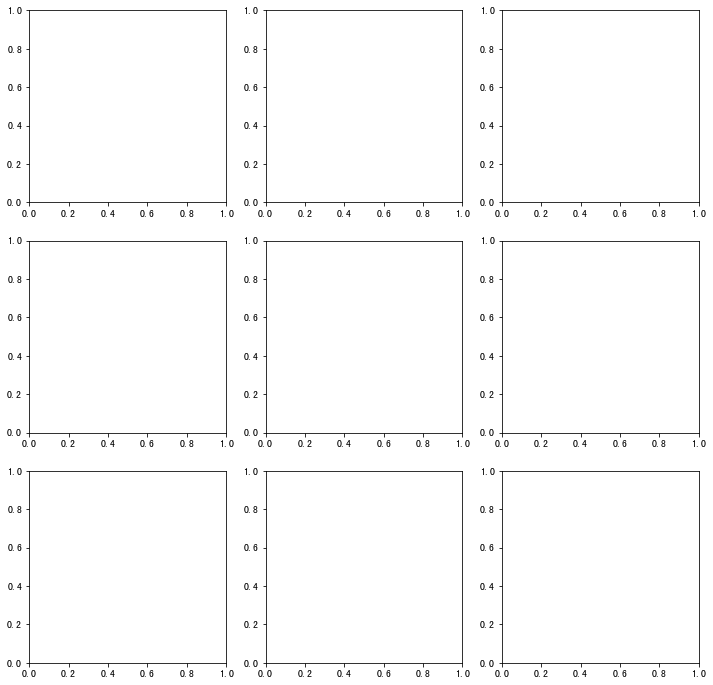

In [ ]:
plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 1)
#sns.barplot('budget', 'revenue', data=train)
plt.subplot(3, 3, 2)
plt.subplot(3, 3, 3)
plt.subplot(3, 3, 4)
plt.subplot(3, 3, 5)
plt.subplot(3, 3, 6)
plt.subplot(3, 3, 7)
plt.subplot(3, 3, 8)
plt.subplot(3, 3, 9)

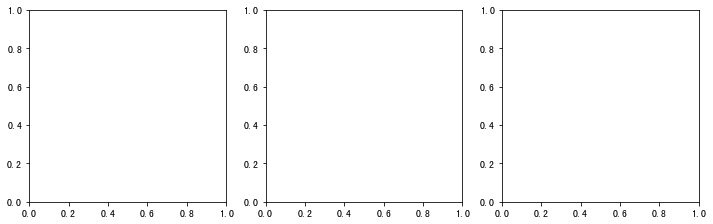

In [ ]:
plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 1)
#sns.barplot('budget', 'revenue', data=train)
plt.subplot(3, 3, 2)
plt.subplot(3, 3, 3)

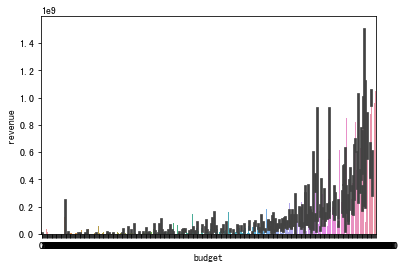

In [ ]:
sns.barplot('budget', 'revenue', data=train)

In [ ]:
sns.barplot('popularity', 'revenue', data=train)

In [ ]:
sns.barplot('runtime', 'revenue', data=train)

In [ ]:
sns.barplot('original_language', 'revenue', data=train)

In [ ]:
sns.barplot('status', 'revenue', data=train)

In [ ]:
train['tagline2'] = train.tagline.apply(lambda x: len(x))

In [ ]:
sns.barplot('tagline2', 'revenue', data=train)

In [ ]:
train.spoken_languages[3].split(':')

In [ ]:
train.spoken_languages[3].split(':')[0].strip('[' + '{' + "'")

In [ ]:
train.spoken_languages[0].split(':')[1].split(',')[0].strip(" "+"'"+"'")

In [ ]:
train['spoken_languages2']= train.spoken_languages.apply(lambda x: x.split(':')[0].strip('[' + '{' + "'"))

In [ ]:
train.spoken_languages2.value_counts()

In [ ]:
train.spoken_languages[3]

In [ ]:
len(train.spoken_languages[3])

In [ ]:
train['spoken_languages2'] = train.spoken_languages.apply(lambda x: len(x)//50)

In [ ]:
train.spoken_languages2.value_counts()

In [ ]:
sns.barplot('spoken_languages2', 'revenue', data=train)

In [ ]:
train['spoken_languages2'] = train.spoken_languages.apply(lambda x: x.count('name'))

In [ ]:
train['spoken_languages2'].value_counts()

In [ ]:
sns.barplot('spoken_languages2', 'revenue', data=train)

In [ ]:
train.release_date

In [ ]:
pd.to_datetime(train.release_date[0])

In [ ]:
type(pd.to_datetime(train.release_date[0]))

In [ ]:
t = pd.to_datetime(train.release_date[0])

In [ ]:
t

In [ ]:
t.year

In [ ]:
pd.to_datetime(train.release_date[0]).year

In [ ]:
pd.to_datetime(train.release_date[0]).month

In [ ]:
pd.to_datetime(train.release_date[0]).day

In [ ]:
pd.to_datetime(train.release_date[0]).weekday()

In [ ]:
train['release_date_year'] = train.release_date.apply(lambda x: pd.to_datetime(x).year)

In [ ]:
train['release_date_month'] = train.release_date.apply(lambda x: pd.to_datetime(x).month)

In [ ]:
train['release_date_day'] = train.release_date.apply(lambda x: pd.to_datetime(x).day)

In [ ]:
train['release_date_weekday'] = train.release_date.apply(lambda x: pd.to_datetime(x).weekday())

In [ ]:
sns.barplot('release_date_year', 'revenue', data=train)

In [ ]:
sns.barplot('release_date_month', 'revenue', data=train)

In [ ]:
sns.barplot('release_date_day', 'revenue', data=train)

In [ ]:
sns.barplot('release_date_weekday', 'revenue', data=train)

In [ ]:
train.production_countries.value_counts()

In [ ]:
train.production_countries[0].split(',')[0].split(':')[1].strip(" '" + "'" )

In [ ]:
print(train.production_countries[0].split(',')[0].split(':')[1].strip(" '" + "'" ))

In [ ]:
train['production_countries2'] = train.production_countries.apply(lambda x: x.split(',')[0].split(':')[1].strip(" '" + "'" ) if len(x) > 6 else x)

In [ ]:
train['production_countries2'].value_counts()

In [ ]:
sns.barplot('production_countries2', 'revenue', data=train)

In [ ]:
train.crew[0].count('id')

In [ ]:
train['crew2'] = train.crew.apply(lambda x: x.count('id'))

In [ ]:
sns.barplot('crew2', 'revenue', data=train)

In [ ]:
train['overview2'] = train.overview.apply(lambda x: len(x))

In [ ]:
sns.barplot('overview2','revenue', data=train)

In [ ]:
train['original_title2'] = train.original_title.apply(lambda x: len(x))

In [ ]:
sns.barplot('original_title2', 'revenue', data=train)

In [ ]:
train['homepage2'] = train.homepage.apply(lambda x: 0 if x=='unknow' else 1)

In [ ]:
train.homepage2.value_counts()

In [ ]:
sns.barplot('homepage2', 'revenue', data=train)

In [ ]:
train['belongs_to_collection2'] = train.belongs_to_collection.apply(lambda x: 0 if x=='unknow' else 1)

In [ ]:
train['belongs_to_collection2'].value_counts()

In [ ]:
sns.barplot('belongs_to_collection2', 'revenue', data=train)

In [ ]:
train.production_companies[0].count('id')

In [ ]:
train['production_companies2'] = train.production_companies.apply(lambda x: x.count('id'))

In [ ]:
train['production_companies2'].value_counts()

In [ ]:
sns.barplot('production_companies2', 'revenue', data=train)

In [ ]:
train['original_title3'] = train.original_title.apply(lambda x: 0 if x=='unknow' else 1)

In [ ]:
train['original_title3'] .value_counts()

In [ ]:
train['title2'] = train.title.apply(lambda x: len(x))

In [ ]:
sns.barplot('title2', 'revenue', data=train)

In [ ]:
train['Keywords2'] = train.Keywords.apply(lambda x: x.count('id'))

In [ ]:
sns.barplot('Keywords2', 'revenue', data=train)

In [ ]:
train.cast[0].count('cast_id')

In [ ]:
train['cast2'] = train.cast.apply(lambda x: x.count('cast_id'))

In [ ]:
sns.barplot('cast2', 'revenue', data=train)

In [ ]:
train['genres2'] = train.genres.apply(lambda x: x.count('id'))

In [ ]:
train.genres2.value_counts()

In [ ]:
sns.barplot('genres2', 'revenue', data=train)

In [ ]:
train.production_countries

In [ ]:
train['production_countries2'] = train.production_countries.apply(lambda x: x.count('name'))

In [ ]:
train.production_countries2.value_counts()

In [ ]:
sns.barplot('production_countries2', 'revenue', data=train)

In [ ]:
train.columns

In [ ]:
test.isnull().sum()[test.isnull().sum()>0]

In [ ]:
test[test.release_date.isnull()]

In [ ]:
test[test.status.isnull()]

In [ ]:
test[test.title.isnull()]

In [ ]:
round(train.release_data_year.mean())

In [ ]:
round(train.release_data_month.mean())

In [ ]:
round(train.release_data_day.mean())

In [ ]:
round(train.release_data_weekday.mean())

In [ ]:
train.status.mode()

In [ ]:
train.title = train.title.fillna("unknow")
test.title = test.title.fillna("unknow")

In [ ]:
train.status = train.status.fillna(train.status.mode())
test.status = test.status.fillna(train.status.mode())

In [ ]:
train.release_date = train.release_date.fillna("unknow")
test.release_date = test.release_date.fillna("unknow")

In [ ]:
# Feature Engeering

train['genres2'] = train.genres.apply(lambda x: x.count('id'))
test['genres2'] = test.genres.apply(lambda x: x.count('id'))

train['cast2'] = train.cast.apply(lambda x: x.count('cast_id'))
test['cast2'] = test.cast.apply(lambda x: x.count('cast_id'))

train['Keywords2'] = train.Keywords.apply(lambda x: x.count('id'))
test['Keywords2'] = test.Keywords.apply(lambda x: x.count('id'))

train['title2'] = train.title.apply(lambda x: len(x))
test['title2'] = test.title.apply(lambda x: len(x))

train['tagline2'] = train.tagline.apply(lambda x: len(x))
test['tagline2'] = test.tagline.apply(lambda x: len(x))

train['spoken_languages2'] = train.spoken_languages.apply(lambda x: x.count('name'))
test['spoken_languages2'] = test.spoken_languages.apply(lambda x: x.count('name'))




train['production_countries2'] = train.production_countries.apply(lambda x: x.count('name'))
test['production_countries2'] = test.production_countries.apply(lambda x: x.count('name'))

train['crew2'] = train.crew.apply(lambda x: x.count('id'))
test['crew2'] = test.crew.apply(lambda x: x.count('id'))

train['overview2'] = train.overview.apply(lambda x: len(x))
test['overview2'] = test.overview.apply(lambda x: len(x))

train['original_title2'] = train.original_title.apply(lambda x: len(x))
test['original_title2'] = test.original_title.apply(lambda x: len(x))

train['homepage2'] = train.homepage.apply(lambda x: 0 if x=='unknow' else 1)
test['homepage2'] = test.homepage.apply(lambda x: 0 if x=='unknow' else 1)

train['belongs_to_collection2'] = train.belongs_to_collection.apply(lambda x: 0 if x=='unknow' else 1)
test['belongs_to_collection2'] = test.belongs_to_collection.apply(lambda x: 0 if x=='unknow' else 1)

train['production_companies2'] = train.production_companies.apply(lambda x: x.count('id'))
test['production_companies2'] = test.production_companies.apply(lambda x: x.count('id'))

In [ ]:
test.release_date[test.release_date=="unknow"] = 0000-00-00

In [ ]:
train['release_date_year'] = train.release_date.apply(lambda x: pd.to_datetime(x).year)
train['release_date_month'] = train.release_date.apply(lambda x: pd.to_datetime(x).month)
train['release_date_day'] = train.release_date.apply(lambda x: pd.to_datetime(x).day)
train['release_date_weekday'] = train.release_date.apply(lambda x: pd.to_datetime(x).weekday())
test['release_date_year'] = test.release_date.apply(lambda x: pd.to_datetime(x).year)
test['release_date_month'] = test.release_date.apply(lambda x: pd.to_datetime(x).month)
test['release_date_day'] = test.release_date.apply(lambda x: pd.to_datetime(x).day)
test['release_date_weekday'] = test.release_date.apply(lambda x: pd.to_datetime(x).weekday())

In [ ]:
train.columns

In [ ]:
train.drop(['spoken_languages3', 'spoken_languages2 ', 'release_data_year', 'release_data_month',
       'release_data_day', 'release_data_weekday',  'train.belongs_to_collection2', 'original_title3', 'production_countries3'], axis=1, inplace=True)

In [ ]:
train.columns

In [ ]:
test.columns

In [ ]:
train2 = train.copy()
test2 = test.copy()

In [ ]:
train.drop(['id', 'belongs_to_collection', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'spoken_languages' , 'tagline', 'title', 'Keywords', 'cast', 'crew'], axis=1, inplace=True)

In [ ]:
test.drop(['id', 'belongs_to_collection', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'spoken_languages' , 'tagline', 'title', 'Keywords', 'cast', 'crew'], axis=1, inplace=True)

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
tmdb = pd.concat([train, test], sort=False)

In [ ]:
tmdb.shape

In [ ]:
tmdb = pd.get_dummies(tmdb)

In [ ]:
tmdb.head()

In [ ]:
len_train = len(train)
len_test = len(test)

In [ ]:
train = tmdb[:len_train]
test = tmdb[len_train:]

In [ ]:
train.revenue.dtype

In [ ]:
train.revenue = train.revenue.astype('int')

In [ ]:
train.revenue.dtype

In [ ]:
xtrain=train.drop("revenue", axis=1)
ytrain=train['revenue']
xtest=test.drop("revenue", axis=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
RF=RandomForestClassifier(random_state=1)
PRF=[{'n_estimators':[10,100],'max_depth':[3,6],'criterion':['gini','entropy']}]
GSRF=GridSearchCV(estimator=RF, param_grid=PRF, scoring='accuracy',cv=2)
scores_rf=cross_val_score(GSRF,xtrain,ytrain,scoring='accuracy',cv=5)

In [ ]:
np.mean(scores_rf)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import log

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(xtrain, ytrain, random_state=1)
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y)


In [ ]:
val_preds = my_model.predict(val_X)

In [ ]:
rmsle = mean_squared_error(np.log(abs(val_preds)), np.log(val_y))

In [ ]:
print("RMSLE: %2f" %sqrt(rmsle))

In [ ]:
val_preds2 = val_preds.copy()

In [ ]:
val_preds[val_preds<0] = 0

In [ ]:
val_preds

In [ ]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( val_preds, val_y))

In [ ]:
val_preds2

In [ ]:
rmsle = mean_squared_error(np.log(abs(val_preds2)), np.log(val_y))

In [ ]:
pred = my_model.predict(xtest)

In [ ]:
test2

In [ ]:
output = pd.DataFrame({'id': test2.id, 'revenue': pred})

In [ ]:
output[output.revenue<0]['revenue'] = 0

In [ ]:
output.to_csv('submission1.csv', index=False)

In [ ]:
output.revenue[output.revenue<0] = 0

In [ ]:
output